In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

amazon = pd.read_csv("C:/Users/edwar/SocialPositivityData/AmazonData/amazon.csv")
goodreads = pd.read_csv("C:/Users/edwar/SocialPositivityData/GoodreadsData/goodreads.csv")
google = pd.read_csv("C:/Users/edwar/SocialPositivityData/GoogleData/google.csv")
yelp = pd.read_csv("C:/Users/edwar/SocialPositivityData/YelpData/yelp.csv")


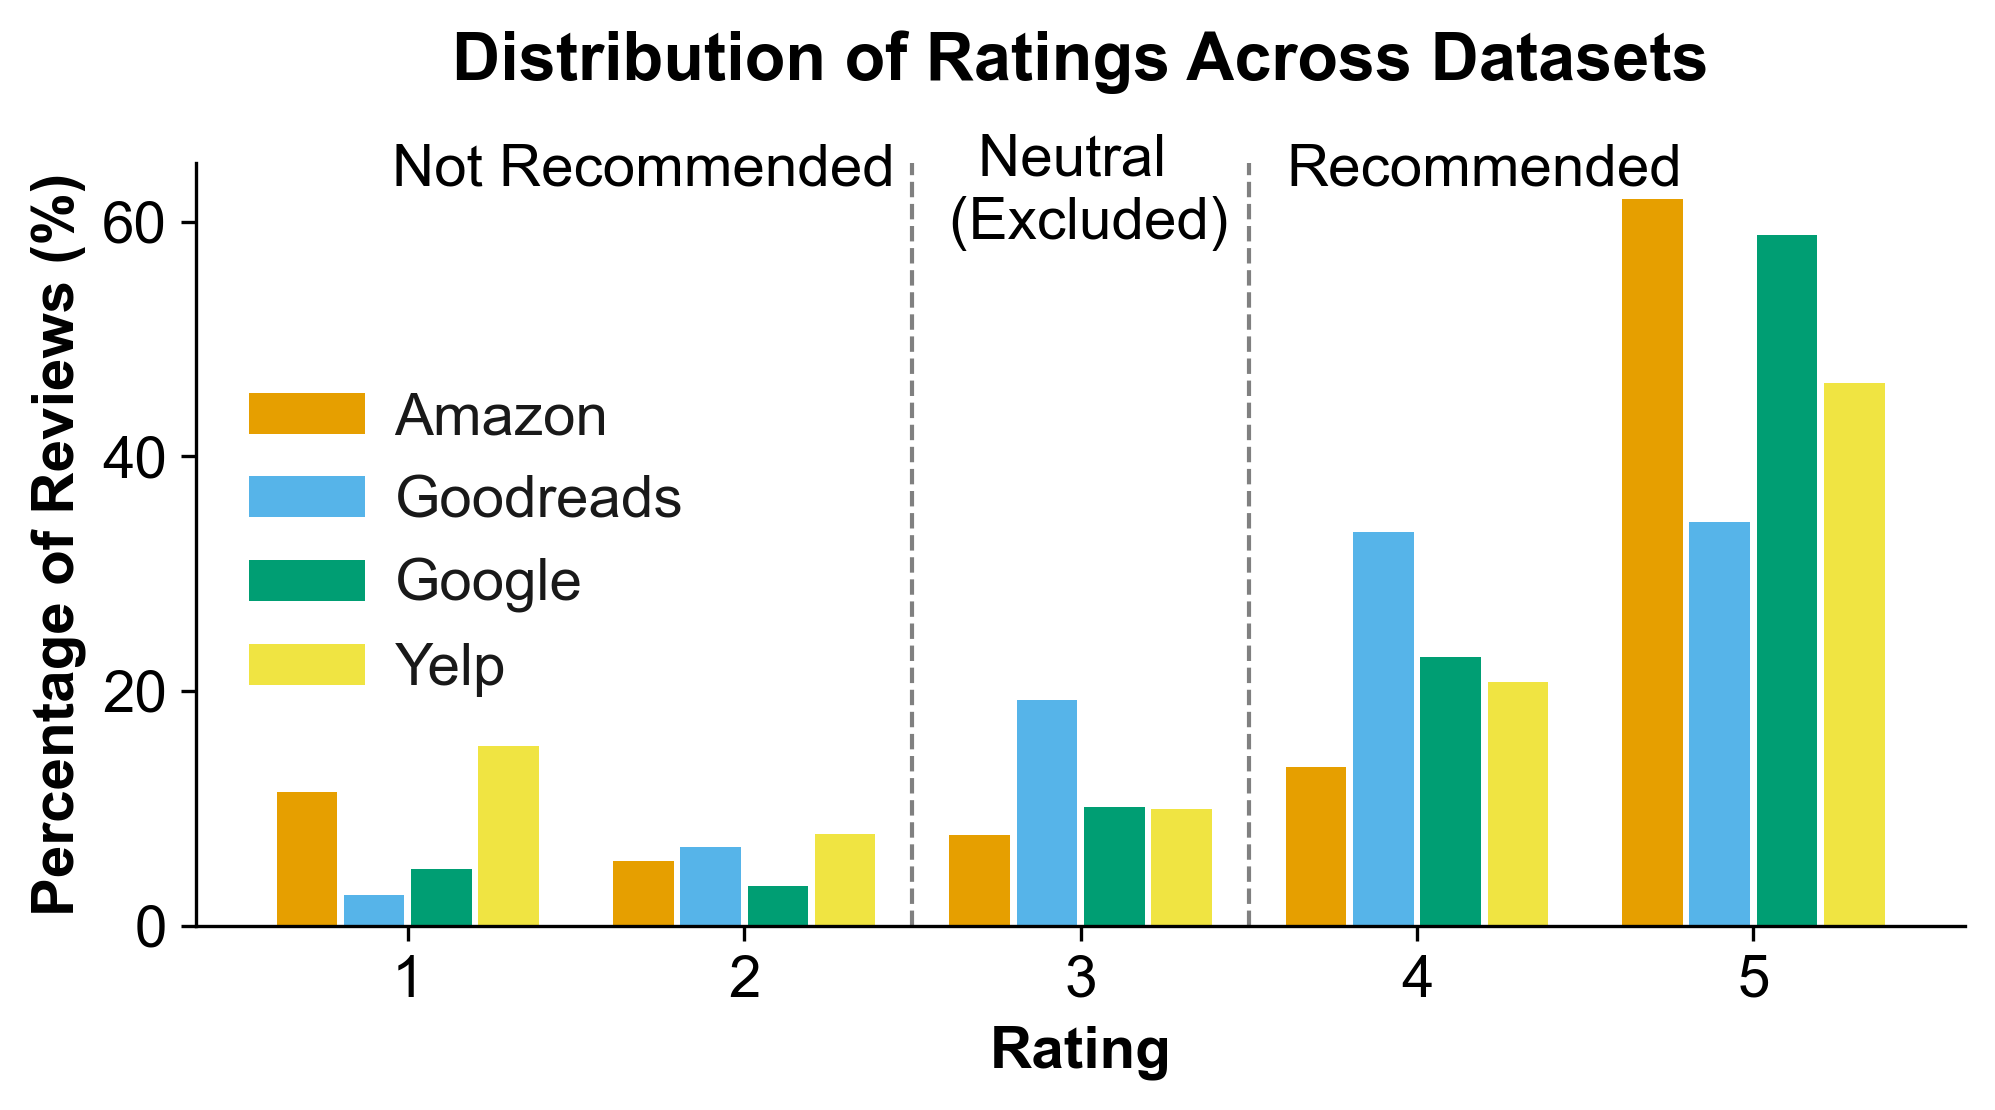

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcdefaults()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (6.75, 3.8)

def get_rating_percent(df):
    counts = df['rating'].value_counts(normalize=True).sort_index() * 100
    return counts.reindex(range(1,6), fill_value=0)

amazon_perc = get_rating_percent(amazon)
goodreads_perc = get_rating_percent(goodreads)
google_perc = get_rating_percent(google)
yelp_perc = get_rating_percent(yelp)

ratings = [1, 2, 3, 4, 5]
x = np.arange(len(ratings))
width = 0.18 
gap = 0.02   

fig, ax = plt.subplots()

colors = ["#E69F00","#56B4E9","#009E73",
               "#F0E442"]

rects1 = ax.bar(x - width*1.5 - gap*1.5, amazon_perc, width, label='Amazon', color=colors[0])
rects2 = ax.bar(x - width/2 - gap/2, goodreads_perc, width, label='Goodreads', color=colors[1])
rects3 = ax.bar(x + width/2 + gap/2, google_perc, width, label='Google', color=colors[2])
rects4 = ax.bar(x + width*1.5 + gap*1.5, yelp_perc, width, label='Yelp', color=colors[3])

ax.axvline(x=1.5, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=2.5, color='gray', linestyle='--', linewidth=1)

ax.text(0.7, ax.get_ylim()[1]*0.97, 'Not Recommended', ha='center', fontsize=14)
ax.text(2, ax.get_ylim()[1]*0.9, 'Neutral \n (Excluded)', ha='center', fontsize=14)
ax.text(3.2, ax.get_ylim()[1]*0.97, 'Recommended', ha='center', fontsize=14)

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Percentage of Reviews (%)', fontweight='bold')
ax.set_title('Distribution of Ratings Across Datasets', fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(ratings)


legend = ax.legend(frameon=False, loc='center left', handletextpad=0.5, fontsize=14)
for text in legend.get_texts():
    text.set_alpha(0.9)

sns.despine()

# def add_labels(rects):
#     for rect in rects:
#         height = rect.get_height()
#         if height > 0:
#             ax.annotate(f'{height:.1f}%',
#                        xy=(rect.get_x() + rect.get_width() / 2, height),
#                        xytext=(1, 3),
#                        textcoords="offset points",
#                        ha='center', va='bottom', fontsize=9)

# add_labels(rects1)
# add_labels(rects2)
# add_labels(rects3)
# add_labels(rects4)

plt.tight_layout()
plt.savefig("C:/Users/edwar/OneDrive/Uni/WiSe2024/Laborpraktikum/socialPositivityRealData/Plots/rating_distribution.png", bbox_inches='tight')
plt.show()


In [ ]:
# Binarize the ratings (1-2 = Not Recommend, 4-5 = Recommend)
def binarize_ratings(df):
    return df['rating'].apply(lambda x: 'Not Recommend' if (x <= 2 and x > 0) else 'Recommend' if x >= 4 else 'Neutral')

def get_recommend_percent(df):
    ratings = binarize_ratings(df)
    filtered = ratings[ratings.isin(['Not Recommend', 'Recommend'])]
    counts = filtered.value_counts(normalize=True) * 100
    return counts[['Not Recommend', 'Recommend']]

amazon_rec = get_recommend_percent(amazon)
goodreads_rec = get_recommend_percent(goodreads)
google_rec = get_recommend_percent(google)
yelp_rec = get_recommend_percent(yelp)
print(amazon_rec)


rating
Not Recommend    18.290675
Recommend        81.709325
Name: proportion, dtype: float64


In [ ]:
print("Amazon:")
print(f"Recommend: {amazon_rec['Recommend']:.1f}%")
print(f"Not Recommend: {amazon_rec['Not Recommend']:.1f}%")
print(f"Sum: {amazon_rec.sum():.1f}%")  # Should be 100%

print("\nGoodreads:")
print(f"Recommend: {goodreads_rec['Recommend']:.1f}%")
print(f"Not Recommend: {goodreads_rec['Not Recommend']:.1f}%")
print(f"Sum: {goodreads_rec.sum():.1f}%")

print("\nGoogle:")
print(f"Recommend: {google_rec['Recommend']:.1f}%")
print(f"Not Recommend: {google_rec['Not Recommend']:.1f}%")
print(f"Sum: {google_rec.sum():.1f}%")

print("\nYelp:")
print(f"Recommend: {yelp_rec['Recommend']:.1f}%")
print(f"Not Recommend: {yelp_rec['Not Recommend']:.1f}%")
print(f"Sum: {yelp_rec.sum():.1f}%")


agg_recommend = (amazon_rec['Recommend'] + goodreads_rec['Recommend'] + 
                 google_rec['Recommend'] + yelp_rec['Recommend']) / 4

agg_not_recommend = (amazon_rec['Not Recommend'] + goodreads_rec['Not Recommend'] + 
                    google_rec['Not Recommend'] + yelp_rec['Not Recommend']) / 4

print("AGGREGATE RECOMMENDATION PERCENTAGES")
print("(Average of individual dataset percentages)")
print("-----------------------------------------")
print(f"Recommend: {agg_recommend:.1f}%")
print(f"Not Recommend: {agg_not_recommend:.1f}%")
print(f"Total: {agg_recommend + agg_not_recommend:.1f}%") 
print(f"\nRecommend/Not Recommend Ratio: {agg_recommend/agg_not_recommend:.2f}:1")


Amazon:
Recommend: 81.7%
Not Recommend: 18.3%
Sum: 100.0%

Goodreads:
Recommend: 88.0%
Not Recommend: 12.0%
Sum: 100.0%

Google:
Recommend: 90.9%
Not Recommend: 9.1%
Sum: 100.0%

Yelp:
Recommend: 74.4%
Not Recommend: 25.6%
Sum: 100.0%
AGGREGATE RECOMMENDATION PERCENTAGES
(Average of individual dataset percentages)
-----------------------------------------
Recommend: 83.7%
Not Recommend: 16.3%
Total: 100.0%

Recommend/Not Recommend Ratio: 5.15:1


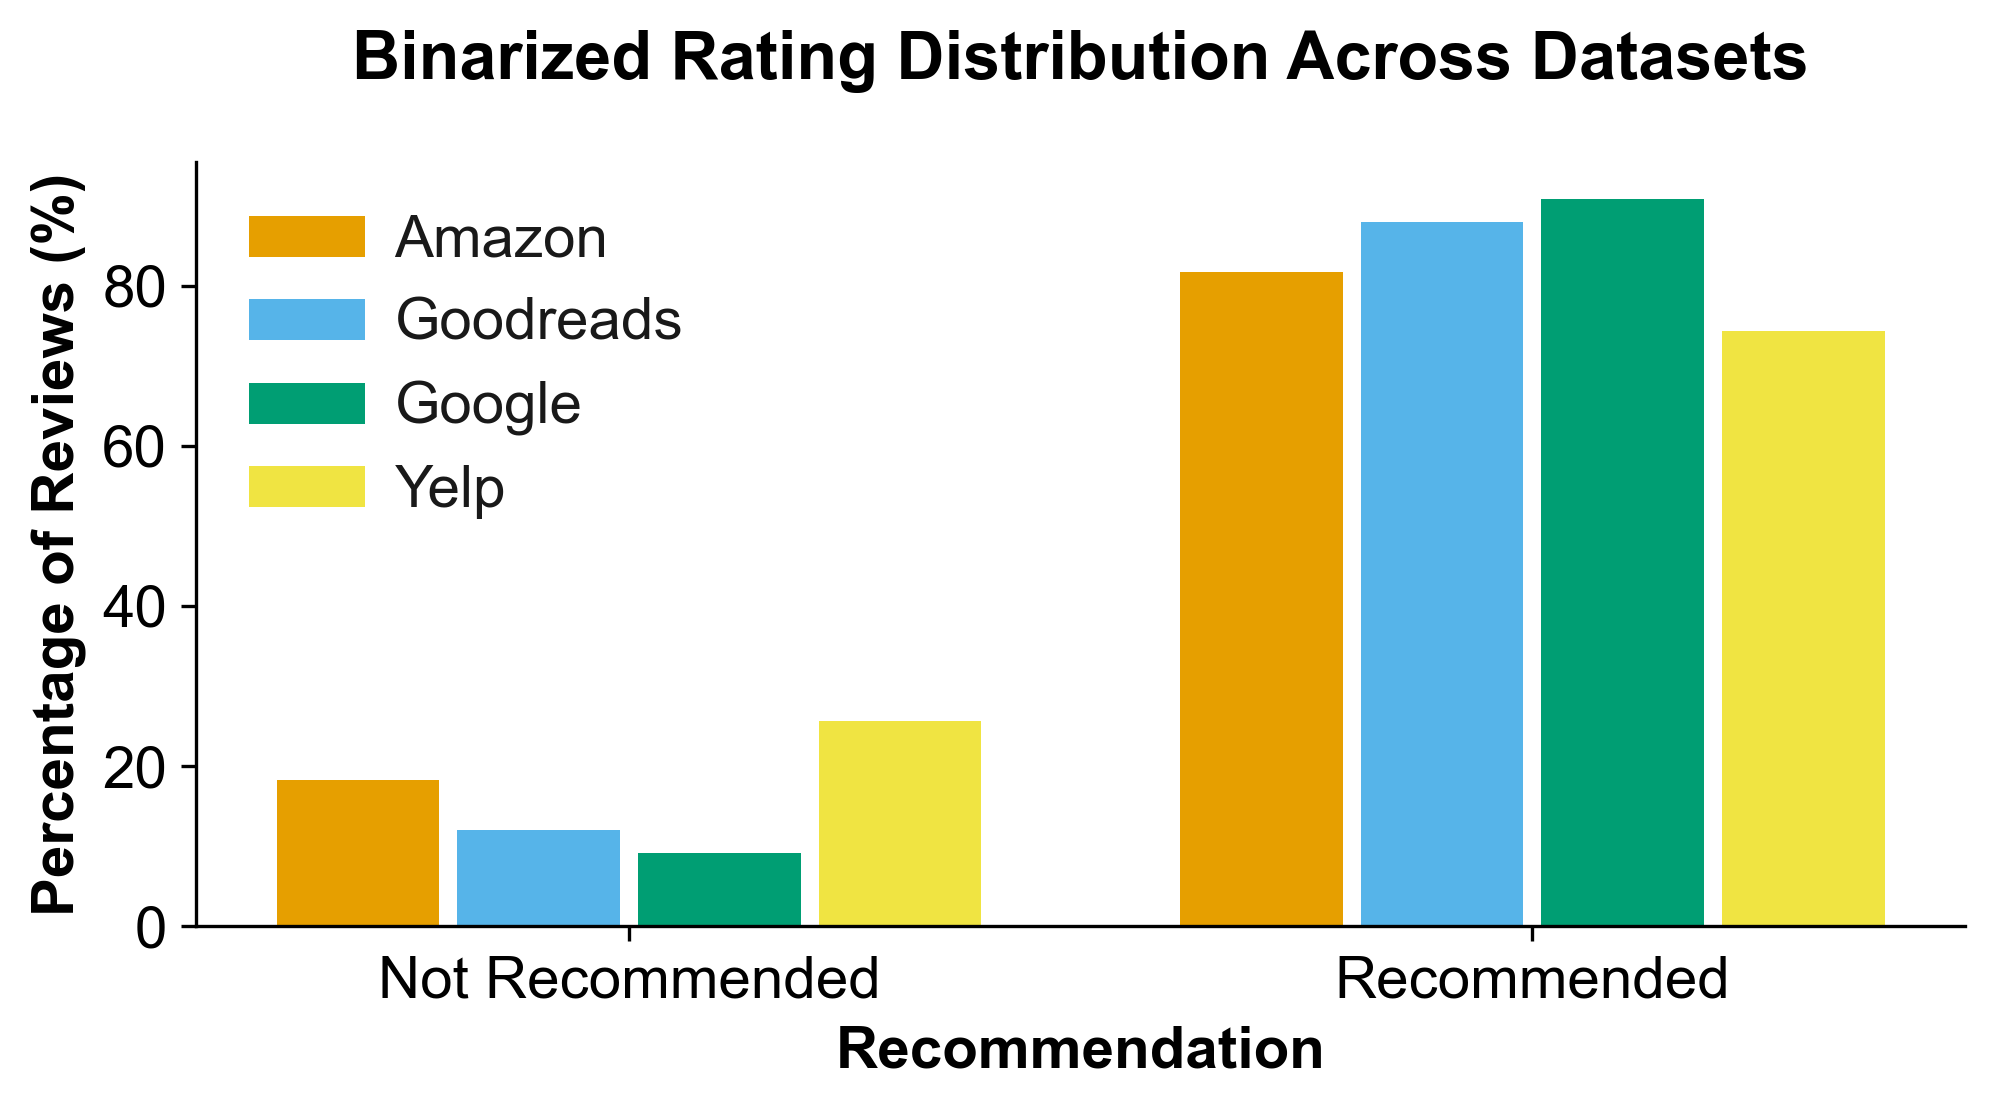

In [ ]:
fig, ax = plt.subplots()
categories = ['Not Recommended', 'Recommended']
x = np.arange(len(categories))
width = 0.18  
gap = 0.02    

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (6.75, 3.8)


colors = {
    'Amazon': '#E69F00',  
    'Goodreads': '#56B4E9',  
    'Google': '#009E73', 
    'Yelp': '#F0E442'  
}

rects1 = ax.bar(x - width*1.5 - gap*1.5, amazon_rec, width, label='Amazon', color=colors['Amazon'])
rects2 = ax.bar(x - width/2 - gap/2, goodreads_rec, width, label='Goodreads', color=colors['Goodreads'])
rects3 = ax.bar(x + width/2 + gap/2, google_rec, width, label='Google', color=colors['Google'])
rects4 = ax.bar(x + width*1.5 + gap*1.5, yelp_rec, width, label='Yelp', color=colors['Yelp'])

ax.set_xlabel('Recommendation', fontweight='bold')
ax.set_ylabel('Percentage of Reviews (%)', fontweight='bold')
ax.set_title('Binarized Rating Distribution Across Datasets', fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(categories)

legend = ax.legend(frameon=False, loc='upper left', handletextpad=0.5, fontsize=14)
for text in legend.get_texts():
    text.set_alpha(0.9)


sns.despine()
plt.tight_layout()
plt.show()